Evaluation of different read count thresholds

1. Upload colon data
2. View highly expressed genes
3. Apply various threshold functions (500, 1000, 1500, etc)
4. View highly expressed genes

Bonus: look at which genes get cut out by down sample function 

In [1]:
import pandas as pd
import anndata as ad
import scanpy as sc
import glob
import numpy as np
import QCPipe
import skmisc

# 1. Upload colon data

In [2]:
path = 'data/GSE185224_clustered_annotated_adata_k10_lr0.92_v1.7.h5ad'
adata = ad.read(path)

/home/jonathan/apps/anaconda3/envs/qc_pipe/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [3]:
adata

AnnData object with n_obs × n_vars = 12590 × 23170
    obs: 'hash_label', 'hash_cluster', 'n_genes', 'species', 'tissue', 'hashed', 'sex', 'group', 'treatment', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'donor', 'region', 'batch', 'S_score', 'G2M_score', 'phase', 'leiden', 'lineage', 'type', 'organ', 'cds', 'donor_region', 'dpt_pseudotime'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 's_phase', 'g2m_phase', 'gene_ids', 'feature_types', 'genome', 'mt', 'Donor_2-n_cells', 'Donor_1-n_cells', 'Donor_3-n_cells', 'Donor_2-n_cells_by_counts', 'Donor_1-n_cells_by_counts', 'Donor_3-n_cells_by_counts', 'Donor_2-mean_counts', 'Donor_1-mean_counts', 'Donor_3-mean_counts', 'Donor_2-pct_dropout_by_counts', 'Donor_1-pct_dropout_by_counts', 'Donor_3-pct_dropout_by_counts', 'Donor_2-total_counts', 'Donor_1-total_counts', 'Donor_3-total_counts'
    uns: 'do

# 2. View highly variable genes

/home/jonathan/apps/anaconda3/envs/qc_pipe/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


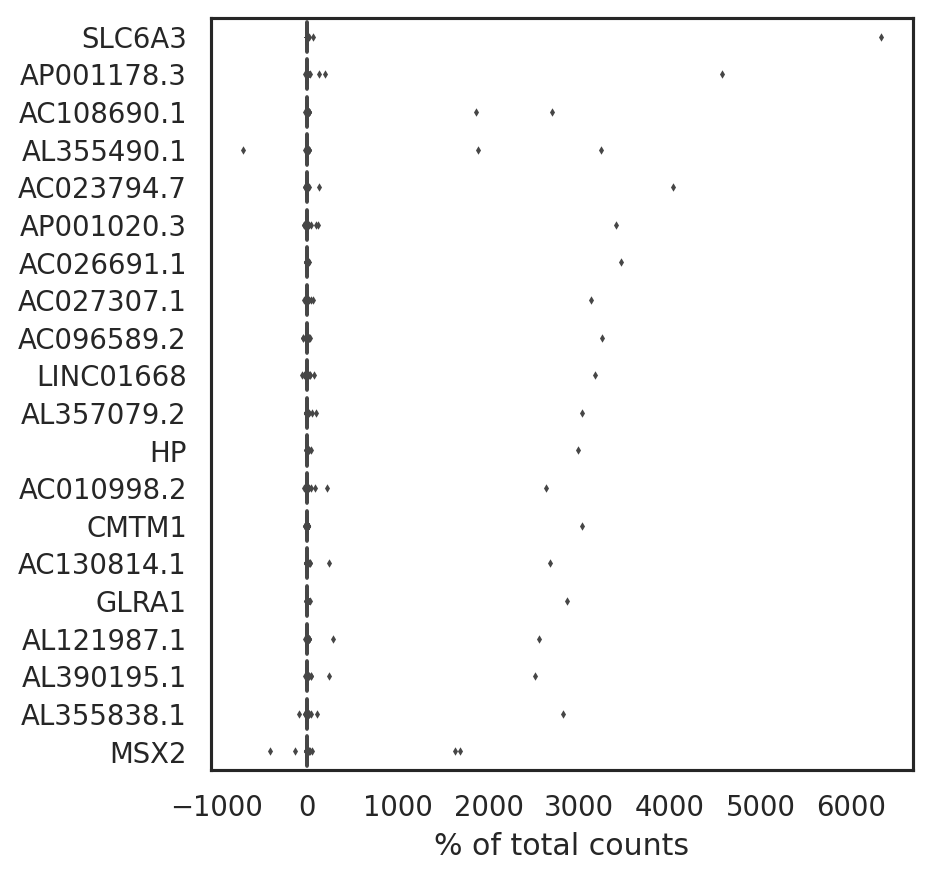

In [4]:
sc.pl.highest_expr_genes(adata, n_top=20)

# 3. Apply various threshold functions (500, 1000, 1500, etc)

In [5]:
# standardize library sizes by removing nucs with low libs and downsampling the rest
def standardize_libs( adata, tar_lib_sz=1000, seed=123):
    # make sure counts for each nuc are current
    sc.pp.calculate_qc_metrics( adata, percent_top=None, inplace=True)
    # print number of nucs to be removed
    print( "Number of low lib nucs removed per run:")
    low_mk = ( adata.obs['total_counts']<=tar_lib_sz)
    print( adata.obs.loc[low_mk,'batch'].value_counts())# / adata.obs['label'].value_counts())
    
    # remove nucs with low library sizes
    #### comment out line below to keep low UMI count nuclei ####
    sc.pp.filter_cells( adata, min_counts=tar_lib_sz, copy=False)
    
    # downsample nuc total counts over target library size
    sc.pp.downsample_counts( adata, counts_per_cell=tar_lib_sz, copy=False, replace=False, random_state=seed)
    # due to scanpy bug in this version have to reset dtype
    adata.X = adata.X.astype( float)
    return

In [6]:
adata_500 = adata.copy()
adata_1000 = adata.copy()
adata_1500 = adata.copy()
adata_2000 = adata.copy()

/home/jonathan/apps/anaconda3/envs/qc_pipe/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [7]:
standardize_libs(adata_500, tar_lib_sz=500, seed=123)
standardize_libs(adata_1000, tar_lib_sz=1000, seed=123)
standardize_libs(adata_1500, tar_lib_sz=1500, seed=123)
standardize_libs(adata_2000, tar_lib_sz=2000, seed=123)

/home/jonathan/apps/anaconda3/envs/qc_pipe/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Number of low lib nucs removed per run:
0    3757
1    2885
2    2560
Name: batch, dtype: int64


/home/jonathan/apps/anaconda3/envs/qc_pipe/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/jonathan/apps/anaconda3/envs/qc_pipe/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Number of low lib nucs removed per run:
0    4222
1    3683
2    3216
Name: batch, dtype: int64


/home/jonathan/apps/anaconda3/envs/qc_pipe/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/jonathan/apps/anaconda3/envs/qc_pipe/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Number of low lib nucs removed per run:
0    4395
1    4018
2    3528
Name: batch, dtype: int64


/home/jonathan/apps/anaconda3/envs/qc_pipe/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/jonathan/apps/anaconda3/envs/qc_pipe/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Number of low lib nucs removed per run:
0    4444
1    4172
2    3667
Name: batch, dtype: int64


/home/jonathan/apps/anaconda3/envs/qc_pipe/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [8]:
print(len(adata_500.obs))
print(len(adata_1000.obs))
print(len(adata_1500.obs))
print(len(adata_2000.obs))

3388
1469
649
307


/home/jonathan/apps/anaconda3/envs/qc_pipe/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


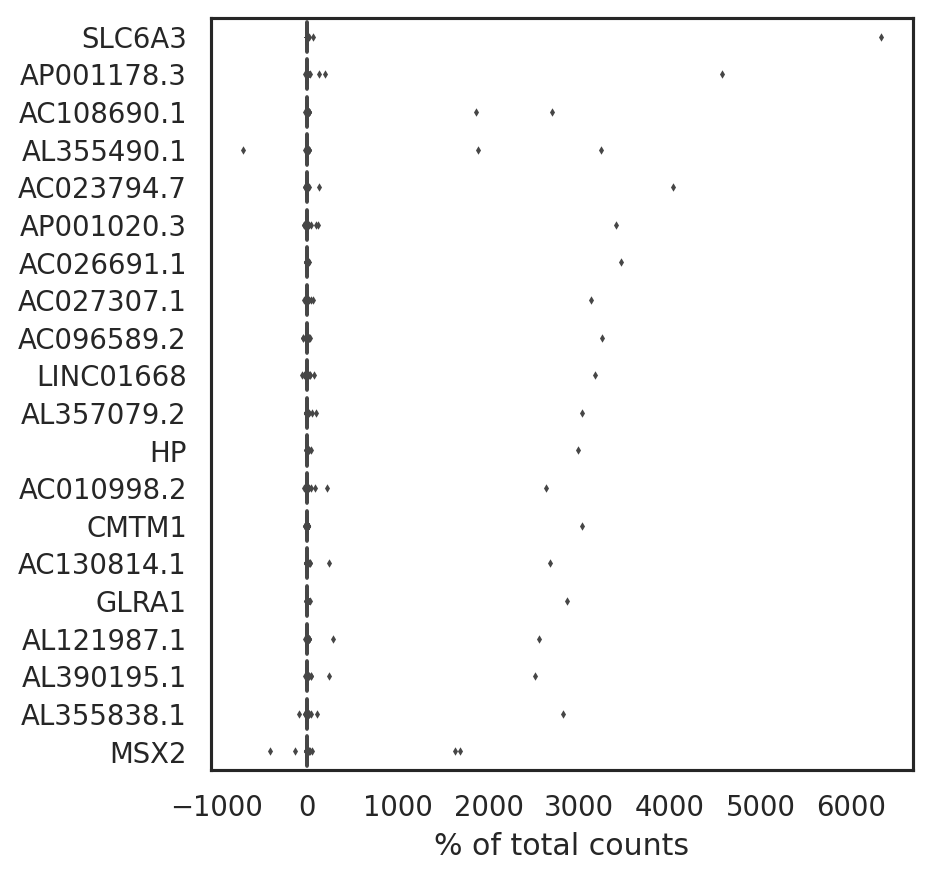

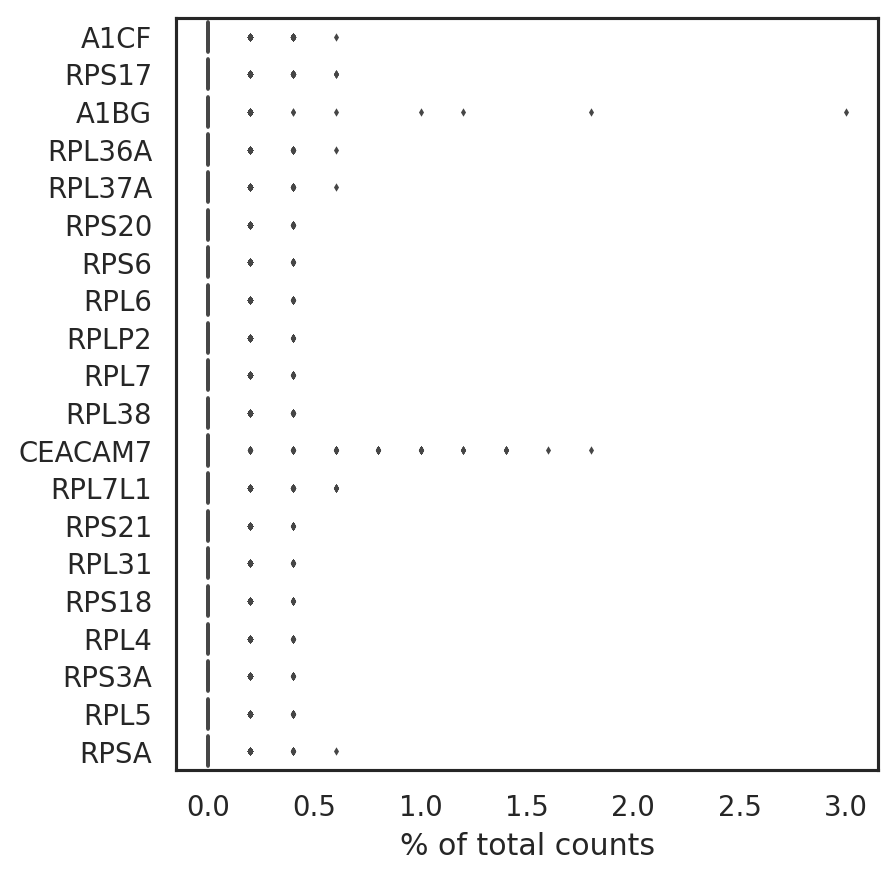

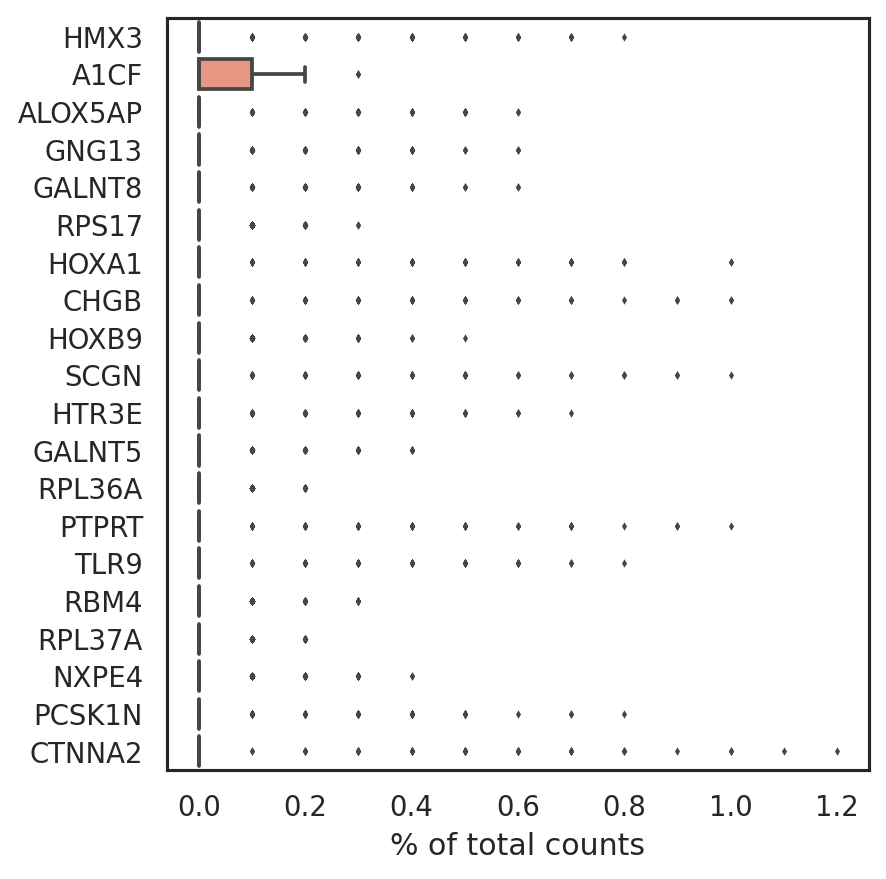

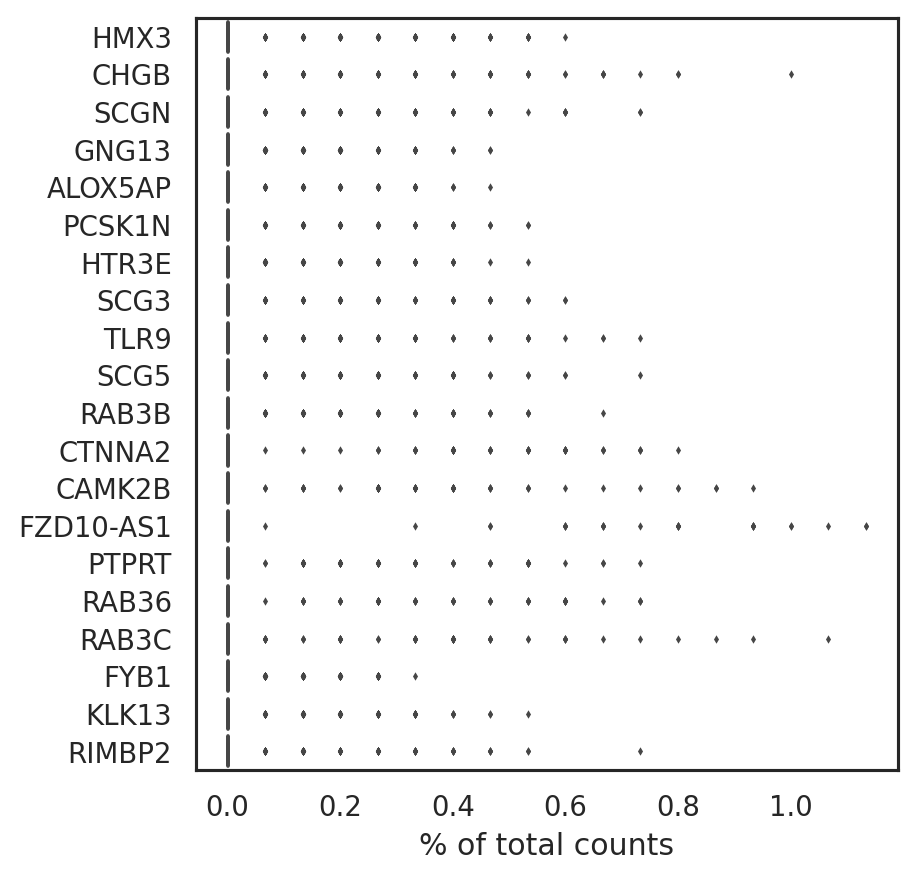

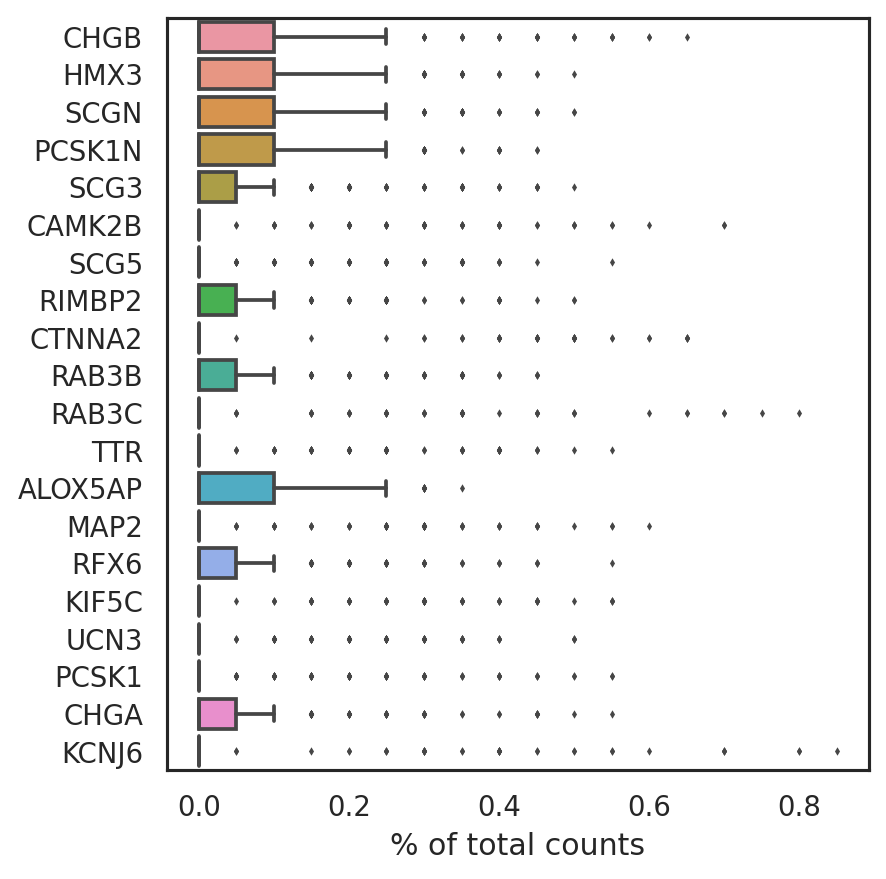

In [9]:
sc.pl.highest_expr_genes(adata, n_top=20)
sc.pl.highest_expr_genes(adata_500, n_top=20)
sc.pl.highest_expr_genes(adata_1000, n_top=20)
sc.pl.highest_expr_genes(adata_1500, n_top=20)
sc.pl.highest_expr_genes(adata_2000, n_top=20)

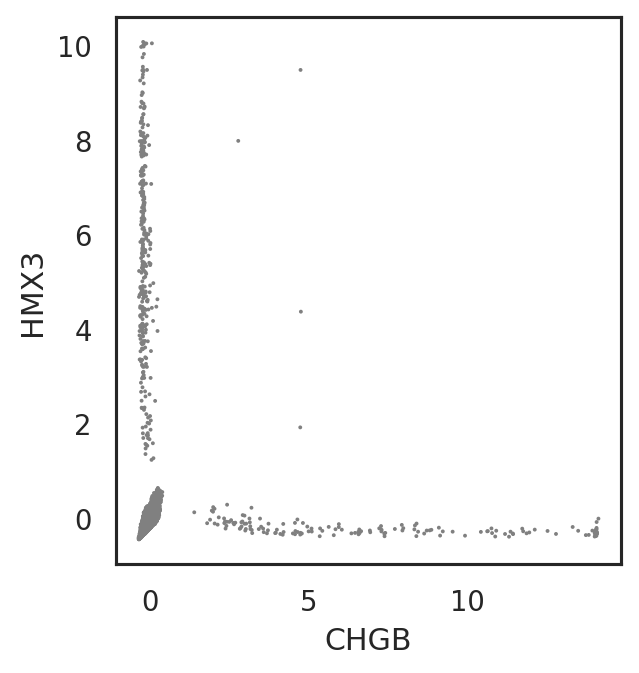

In [10]:
sc.pl.scatter(adata, x='CHGB', y='HMX3')

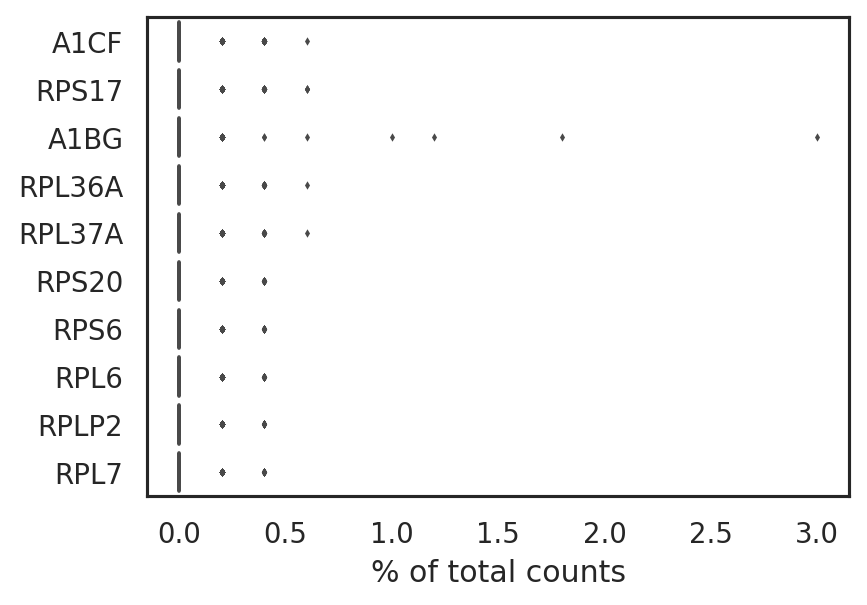

In [11]:
ax500 = sc.pl.highest_expr_genes(adata_500, n_top=10, show=False)

In [12]:
adata_500.var['total_counts'].sort_values(ascending=False)

TPT1      431.356415
RPL13A    407.710449
ACTG1     378.683563
EPCAM     371.022034
MT-CYB    362.264740
             ...    
CD53     -451.292389
CCL5     -452.657440
GMFG     -462.043701
LCP1     -490.578766
SRGN     -536.363892
Name: total_counts, Length: 23170, dtype: float32

In [13]:
norm_dict = sc.preprocessing.normalize_total(adata_500,inplace=False)
mean_percent = norm_dict['X'].mean(axis=0)
top_idx = np.argsort(mean_percent)[::-1][:10]
adata_500.var_names[top_idx]

Index(['A1CF', 'RPS17', 'A1BG', 'RPL36A', 'RPL37A', 'RPS20', 'RPS6', 'RPL6',
       'RPLP2', 'RPL7'],
      dtype='object')

In [14]:
top_500 = list(adata_500.var_names[top_idx])
top_500

['A1CF',
 'RPS17',
 'A1BG',
 'RPL36A',
 'RPL37A',
 'RPS20',
 'RPS6',
 'RPL6',
 'RPLP2',
 'RPL7']

In [15]:
norm_dict

{'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]]),
 'norm_factor': array([500., 500., 500., ..., 500., 500., 500.])}

In [16]:
adata_500.var.iloc[top_idx[0]]

highly_variable                            False
means                                   0.145997
dispersions                              1.31153
dispersions_norm                      -0.0216803
mean                                -2.51521e-10
std                                     0.989686
s_phase                                    False
g2m_phase                                  False
gene_ids                         ENSG00000148584
feature_types                    Gene Expression
genome                                    GRCh38
mt                                         False
Donor_2-n_cells                             2792
Donor_1-n_cells                             2271
Donor_3-n_cells                             2564
Donor_2-n_cells_by_counts                   2792
Donor_1-n_cells_by_counts                   2271
Donor_3-n_cells_by_counts                   2564
Donor_2-mean_counts                     0.503407
Donor_1-mean_counts                     0.625816
Donor_3-mean_counts 

In [17]:
adata_500.var.sort_values('total_counts', ascending=False)

,highly_variable,means,dispersions,dispersions_norm,mean,std,s_phase,g2m_phase,gene_ids,feature_types,...,Donor_3-pct_dropout_by_counts,Donor_2-total_counts,Donor_1-total_counts,Donor_3-total_counts,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
TPT1,False,0.115550,0.703680,-1.834292,1.180090e-10,0.972177,False,False,ENSG00000133112,Gene Expression,...,1.706142,268275.0,352107.0,414678.0,12590,0.034262,0.033688,0.0,431.356415,6.069250
RPL13A,False,0.216299,0.818570,-1.492158,-2.384639e-10,0.996613,False,False,ENSG00000142541,Gene Expression,...,4.656764,83284.0,167925.0,195114.0,12590,0.032384,0.031870,0.0,407.710449,6.013007
ACTG1,False,0.172971,0.904509,-1.235412,-2.689360e-10,0.997633,False,False,ENSG00000184009,Gene Expression,...,7.667603,58680.0,84743.0,93443.0,12590,0.030078,0.029635,0.0,378.683563,5.939338
EPCAM,False,0.150820,0.808300,-1.522310,-2.541997e-11,0.991618,False,False,ENSG00000119888,Gene Expression,...,8.932156,100627.0,90501.0,88056.0,12590,0.029470,0.029044,0.0,371.022034,5.918953
MT-CYB,False,0.051877,0.605379,-3.586859,1.483307e-10,0.992767,False,False,ENSG00000198727,Gene Expression,...,0.040145,601404.0,2830465.0,1946745.0,12590,0.028774,0.028368,0.0,362.264740,5.895132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CD53,False,0.004634,2.527724,4.745059,-2.701116e-11,0.390775,False,False,ENSG00000143119,Gene Expression,...,99.939783,50.0,7.0,3.0,12590,-0.035845,-0.036504,0.0,-451.292389,NaN
CCL5,True,0.067776,4.206116,12.019629,-8.686955e-12,0.438281,False,False,ENSG00000271503,Gene Expression,...,99.678844,347.0,89.0,57.0,12590,-0.035954,-0.036616,0.0,-452.657440,NaN
GMFG,False,0.005511,2.409362,4.232049,5.462368e-11,0.450331,False,False,ENSG00000130755,Gene Expression,...,99.859494,70.0,5.0,9.0,12590,-0.036699,-0.037390,0.0,-462.043701,NaN
LCP1,True,0.012521,3.030173,6.922798,1.957624e-10,0.405042,False,False,ENSG00000136167,Gene Expression,...,99.899639,140.0,NaN,14.0,12590,-0.038966,-0.039745,0.0,-490.578766,NaN


# Up until now I've been looking at highly expressed genes BUT Simran and Lucy have convinced me that it may be more informative to focus on the highly variable genes instead. Let's give it a try.

In [5]:
adata.raw = adata

In [6]:
sc.pp.log1p(adata)

In [4]:
sc.pp.highly_variable_genes(adata, n_top_genes=10, flavor='cell_ranger')

In [7]:
highly_variable = adata.var['highly_variable']

In [11]:
highly_variable = adata.var[highly_variable == True]

In [12]:
highly_variable

,highly_variable,means,dispersions,dispersions_norm,mean,std,s_phase,g2m_phase,gene_ids,feature_types,...,Donor_3-n_cells_by_counts,Donor_2-mean_counts,Donor_1-mean_counts,Donor_3-mean_counts,Donor_2-pct_dropout_by_counts,Donor_1-pct_dropout_by_counts,Donor_3-pct_dropout_by_counts,Donor_2-total_counts,Donor_1-total_counts,Donor_3-total_counts
AC245041.1,True,1.272222e-06,7.738360e+05,53.596142,1.873423e-10,0.477238,False,False,ENSG00000273760,Gene Expression,...,25.0,0.001115,0.000933,0.005018,99.900880,99.906687,99.498193,9.0,6.0,25.0
CACNA1G,True,1.854706e-06,5.119895e+05,35.312977,-5.856830e-11,0.275433,False,False,ENSG00000006283,Gene Expression,...,8.0,NaN,0.000622,0.001807,NaN,99.937792,99.839422,NaN,4.0,9.0
FAM135B,True,1.452954e-06,7.254544e+05,50.217949,4.607004e-11,0.338217,False,False,ENSG00000147724,Gene Expression,...,9.0,0.000496,0.000778,0.001807,99.950440,99.922240,99.819350,4.0,5.0,9.0
FFAR3,True,1.365382e-06,7.431889e+05,51.456242,3.424335e-10,0.451564,False,False,ENSG00000185897,Gene Expression,...,NaN,0.003841,0.001555,NaN,99.640689,99.860031,NaN,31.0,10.0,NaN
GPN1,True,6.332670e-07,1.584102e+06,110.172119,2.439613e-10,0.998861,False,False,ENSG00000198522,Gene Expression,...,636.0,0.099120,0.129705,0.145925,91.091562,89.175739,87.234043,800.0,834.0,727.0
KCNA7,True,1.014690e-07,9.665784e+06,674.467407,3.629267e-10,0.464200,False,False,ENSG00000104848,Gene Expression,...,8.0,0.000867,0.003110,0.001807,99.913270,99.720062,99.839422,7.0,20.0,9.0
LINC02573,True,1.788862e-06,5.896280e+05,40.734005,-2.451407e-11,0.313869,False,False,ENSG00000233236,Gene Expression,...,14.0,NaN,NaN,0.004416,NaN,NaN,99.718988,NaN,NaN,22.0
OR7C1,True,1.639767e-06,6.432241e+05,44.476299,1.880212e-11,0.289208,False,False,ENSG00000127530,Gene Expression,...,9.0,NaN,0.000622,0.001807,NaN,99.937792,99.819350,NaN,4.0,9.0
PIGH,True,2.630960e-08,3.759612e+07,2624.674561,-5.032129e-10,0.999579,False,False,ENSG00000100564,Gene Expression,...,653.0,0.086978,0.135303,0.149739,91.859745,88.040435,86.892814,702.0,870.0,746.0
PITPNB,True,1.071229e-06,9.224356e+05,63.971958,-3.182356e-10,0.997199,False,False,ENSG00000180957,Gene Expression,...,1306.0,0.219799,0.286159,0.355279,81.848594,78.600311,73.785628,1774.0,1840.0,1770.0


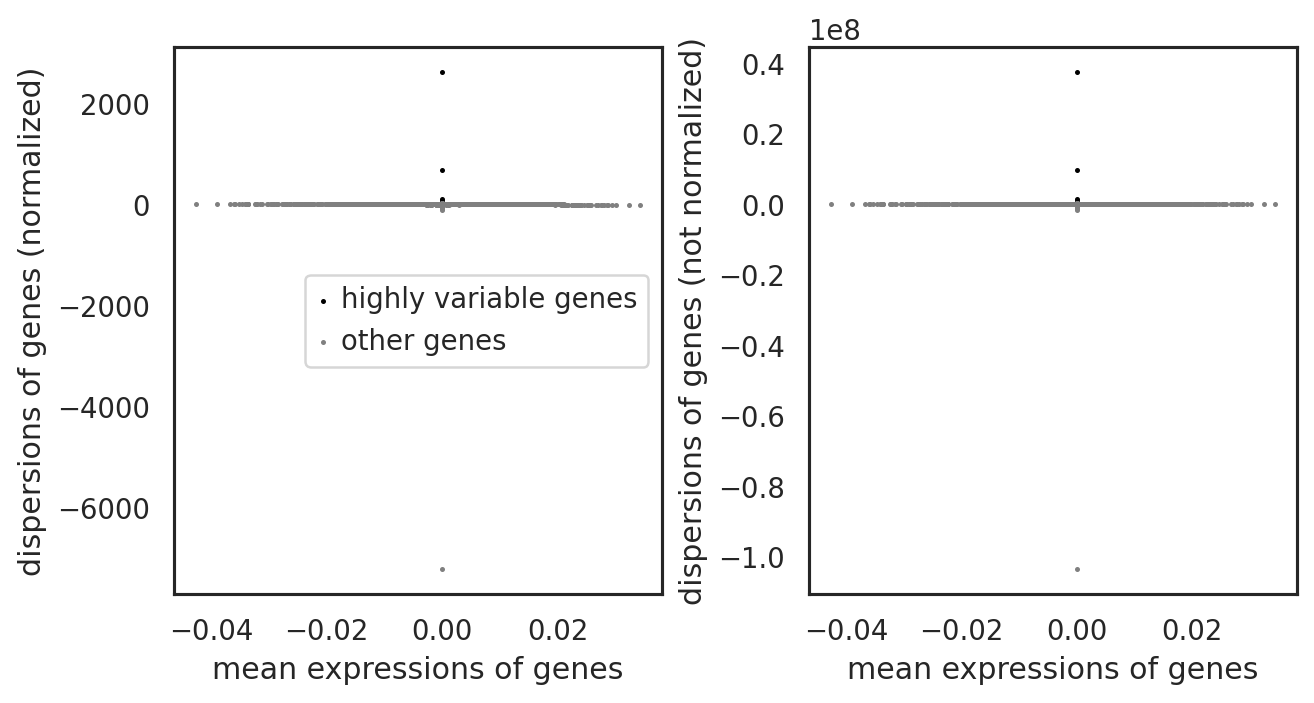

In [13]:
sc.pl.highly_variable_genes(adata)

# Let's start a new notebook for the highly variable